In [18]:
import numpy as np
import numpy.linalg as alg

import matplotlib.pyplot as plt


In [134]:
imax = 5
jmax = 5
s = imax*jmax
a = .1 # largeur en mètres de la boîte selon Ox
b = .1 # hauteur en mètres de la boîte selon Oy
dx = a/imax
dy = b/jmax


def carre2vec(i,j): # entrées indicées à partir de 1
    return imax*(j-1)+i-1 # sortie indicée à partir de 0 (pour python)

S = np.zeros(shape=(s,s),dtype=float)

for i in range(1,imax+1):     # jusqu'à imax
    for j in range(1,jmax+1): # jusqu'à jmax
        k = carre2vec(i,j)
        S[k][k] += (-2/dx**2-2/dy**2)
        if j<jmax:
            S[k][carre2vec(i,j+1)] += 1/dy**2
        if j>1:
            S[k][carre2vec(i,j-1)] += 1/dy**2
        if i<imax:
            S[k][carre2vec(i+1,j)] += 1/dx**2
        if i>1:
            S[k][carre2vec(i-1,j)] += 1/dx**2

Si = alg.inv(S)

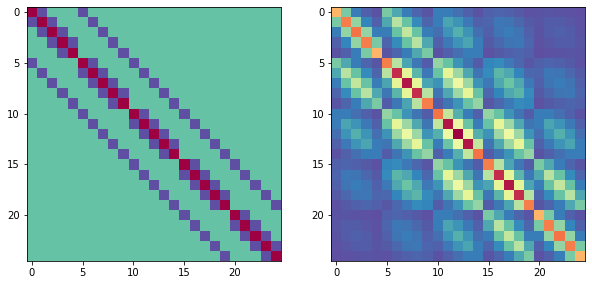

In [135]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
imf = ax[0].imshow(S, cmap='Spectral')
ime = ax[1].imshow(Si, cmap='Spectral')

In [136]:
S[0][0] == -2/dx/dx - 2/dy / dy

True

In [123]:
laplacien = np.ones((imax,jmax),dtype=float)
laplacien

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.

In [124]:
laplacien = laplacien.reshape((s,1))

In [125]:
pression = np.matmul(Si,laplacien)
pression = pression.reshape((imax,jmax))

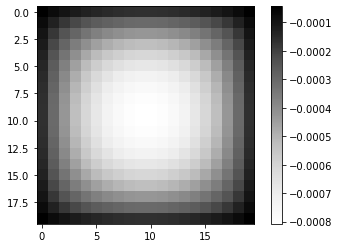

In [126]:
fig = plt.figure()
c = plt.imshow(pression,cmap='Greys')
plt.colorbar(c)

In [127]:
def SOR_iter(DeltaP,P,omega):
    err = 0
    for i in range(1,imax+1):
        for j in range(1,jmax+1):
            former = P[i][j]
            P[i][j] = (1-omega)*P[i][j] + omega/( (int(i<imax)+int(i>1))/dx/dx + (int(j<jmax)+int(j>1))/dy/dy ) * ( ((i<imax)*P[i+1][j] + (i>1)*P[i-1][j])/dx/dx + ((j<jmax)*P[i][j+1] + (j>1)*P[i][j-1])/dy/dy - DeltaP[i][j] )
            err = max(err,abs(former-P[i][j]))
    return err

In [128]:
pression = np.zeros((imax+2,jmax+2),dtype=float)
laplacien = np.ones((imax+2,jmax+2),dtype=float)
SOR_iter(laplacien,pression,.5)


iter = 0
err = 10
while(iter<100 and err >1e-6):
    err = SOR_iter(laplacien,pression,1.7)
    iter += 1
print("iter=",iter,"err=",round(err,6))

iter= 100 err= 7.5e-05


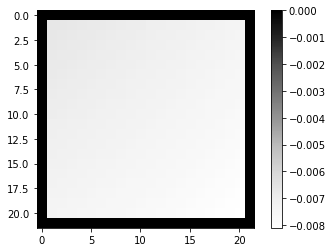

In [129]:
fig = plt.figure()
c = plt.imshow(pression,cmap='Greys')
plt.colorbar(c)